In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')
df=df.iloc[:,1:]
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Telco_customer_churn_adapted_v2.xlsx'

In [ ]:
df.shape
df = df.drop(columns=['Longitude', 'Latitude'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tenure Months                 7043 non-null   int64  
 1   Location                      7043 non-null   object 
 2   Device Class                  7043 non-null   object 
 3   Games Product                 7043 non-null   object 
 4   Music Product                 7043 non-null   object 
 5   Education Product             7043 non-null   object 
 6   Call Center                   7043 non-null   object 
 7   Video Product                 7043 non-null   object 
 8   Use MyApp                     7043 non-null   object 
 9   Payment Method                7043 non-null   object 
 10  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 11  Churn Label                   7043 non-null   object 
 12  CLTV (Predicted Thou. IDR)    7043 non-null   float64
dtypes: 

# `Assessing Data`

- `Customer ID:` Mengidentifikasi setiap pelanggan secara unik.
- `Tenure Months:` Menunjukkan berapa lama pelanggan telah menjadi pelanggan perusahaan.
- `Location:` Lokasi atau daerah tempat pelanggan berada, dalam hal ini Jakarta dan Bandung.
- `Device Class:` Menunjukkan jenis perangkat atau kelas perangkat yang digunakan oleh pelanggan (Low End, Mid End, High End).
- `Games Product,` Music Product, Education Product, Video Product: Menunjukkan jenis produk atau layanan yang digunakan oleh pelanggan.
- `Call Center:` Menunjukkan apakah pelanggan pernah berinteraksi dengan pusat panggilan perusahaan.
- `Use MyApp:` Menunjukkan apakah pelanggan menggunakan aplikasi perusahaan.
- `Payment Method:` Cara pembayaran yang digunakan oleh pelanggan (Digital Wallet, Pulsa, Kredit, Debit).
- `Monthly Purchase (Thou. IDR):` Jumlah pembelian bulanan dalam ribuan Rupiah oleh pelanggan.
- `Churn Label:` Menunjukkan apakah pelanggan telah beralih dari layanan perusahaan (Yes berarti pelanggan sudah tidak lagi berlangganan).
- `Longitude dan Latitude:` Koordinat geografis lokasi pelanggan.
- `CLTV (Predicted Thou. IDR):` Nilai perkiraan Customer Lifetime Value (CLTV) pelanggan dalam ribuan Rupiah. CLTV adalah perkiraan pendapatan yang diharapkan dari seorang pelanggan selama masa langganan mereka.

- Device
    - `Low End:` Kentang
    - `Mid End:` Standar
    - `High End:` Gahar
    <br><br>

- Product
    - `No Internet Service:` Tidak Support
    - `No:` Tidak Berlangganan
    - `Yes:` Berlangganan


# cek value setiap column

In [ ]:
df.head()

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR)
0,1,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.505,Yes,5371.6
1,9,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.635,Yes,7023.9
2,12,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.700,Yes,4595.5
3,1,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.830,Yes,7657.0
4,7,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Pulsa,25.025,Yes,5835.7


In [ ]:
num_cols = ['Customer ID', 'Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)']

for col in df.columns:
    if col not in num_cols:
        print(f'==>{col}')
        print(df[col].value_counts(), '\n')

==>Location
Jakarta    5031
Bandung    2012
Name: Location, dtype: int64 

==>Device Class
High End    3096
Mid End     2421
Low End     1526
Name: Device Class, dtype: int64 

==>Games Product
No                     3497
Yes                    2019
No internet service    1526
                          1
Name: Games Product, dtype: int64 

==>Music Product
No                     3088
Yes                    2429
No internet service    1526
Name: Music Product, dtype: int64 

==>Education Product
No                     3095
Yes                    2422
No internet service    1526
Name: Education Product, dtype: int64 

==>Call Center
No     4999
Yes    2044
Name: Call Center, dtype: int64 

==>Video Product
No                     2810
Yes                    2707
No internet service    1526
Name: Video Product, dtype: int64 

==>Use MyApp
No                     2785
Yes                    2732
No internet service    1526
Name: Use MyApp, dtype: int64 

==>Payment Method
Pulsa             2

array([[<AxesSubplot:title={'center':'Tenure Months'}>,
        <AxesSubplot:title={'center':'Monthly Purchase (Thou. IDR)'}>],
       [<AxesSubplot:title={'center':'CLTV (Predicted Thou. IDR)'}>,
        <AxesSubplot:>]], dtype=object)

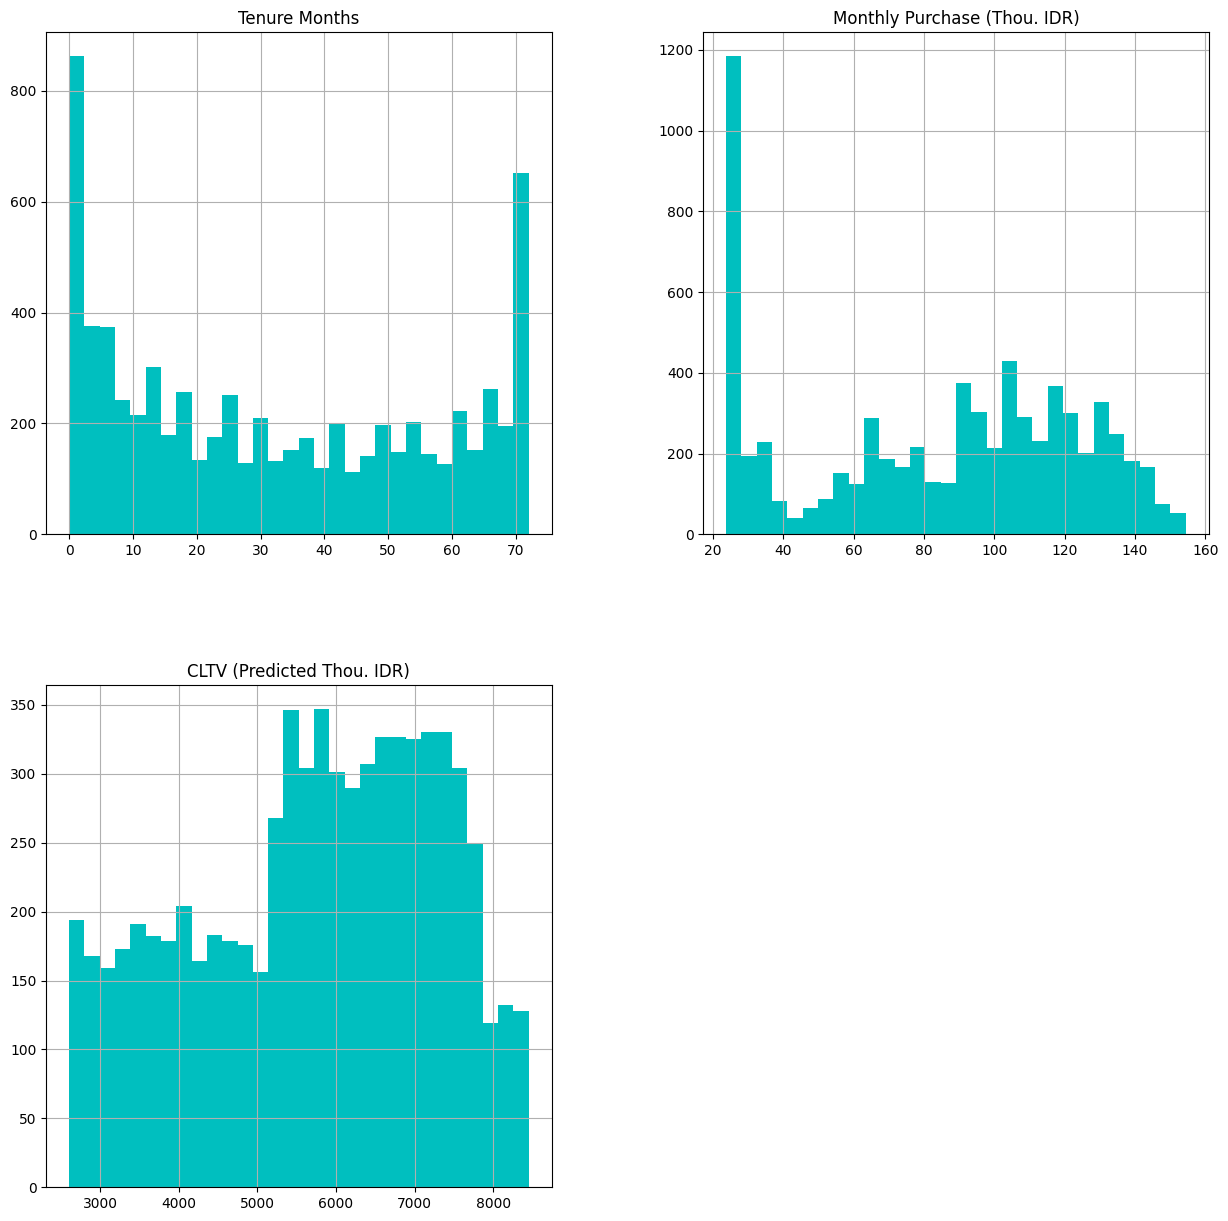

In [ ]:
df.hist(figsize=(15,15), bins=30, color='c')

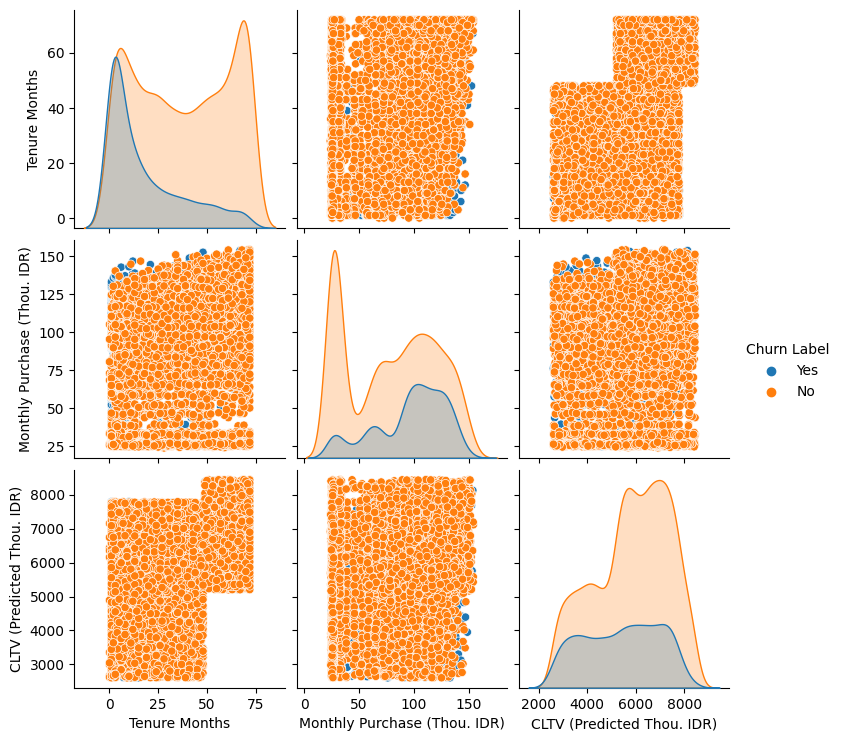

In [ ]:
sns.pairplot(df, hue="Churn Label")

In [ ]:
df.head()
num_cols = ['tenure_months', 'monthly_purchase', 'cltv']

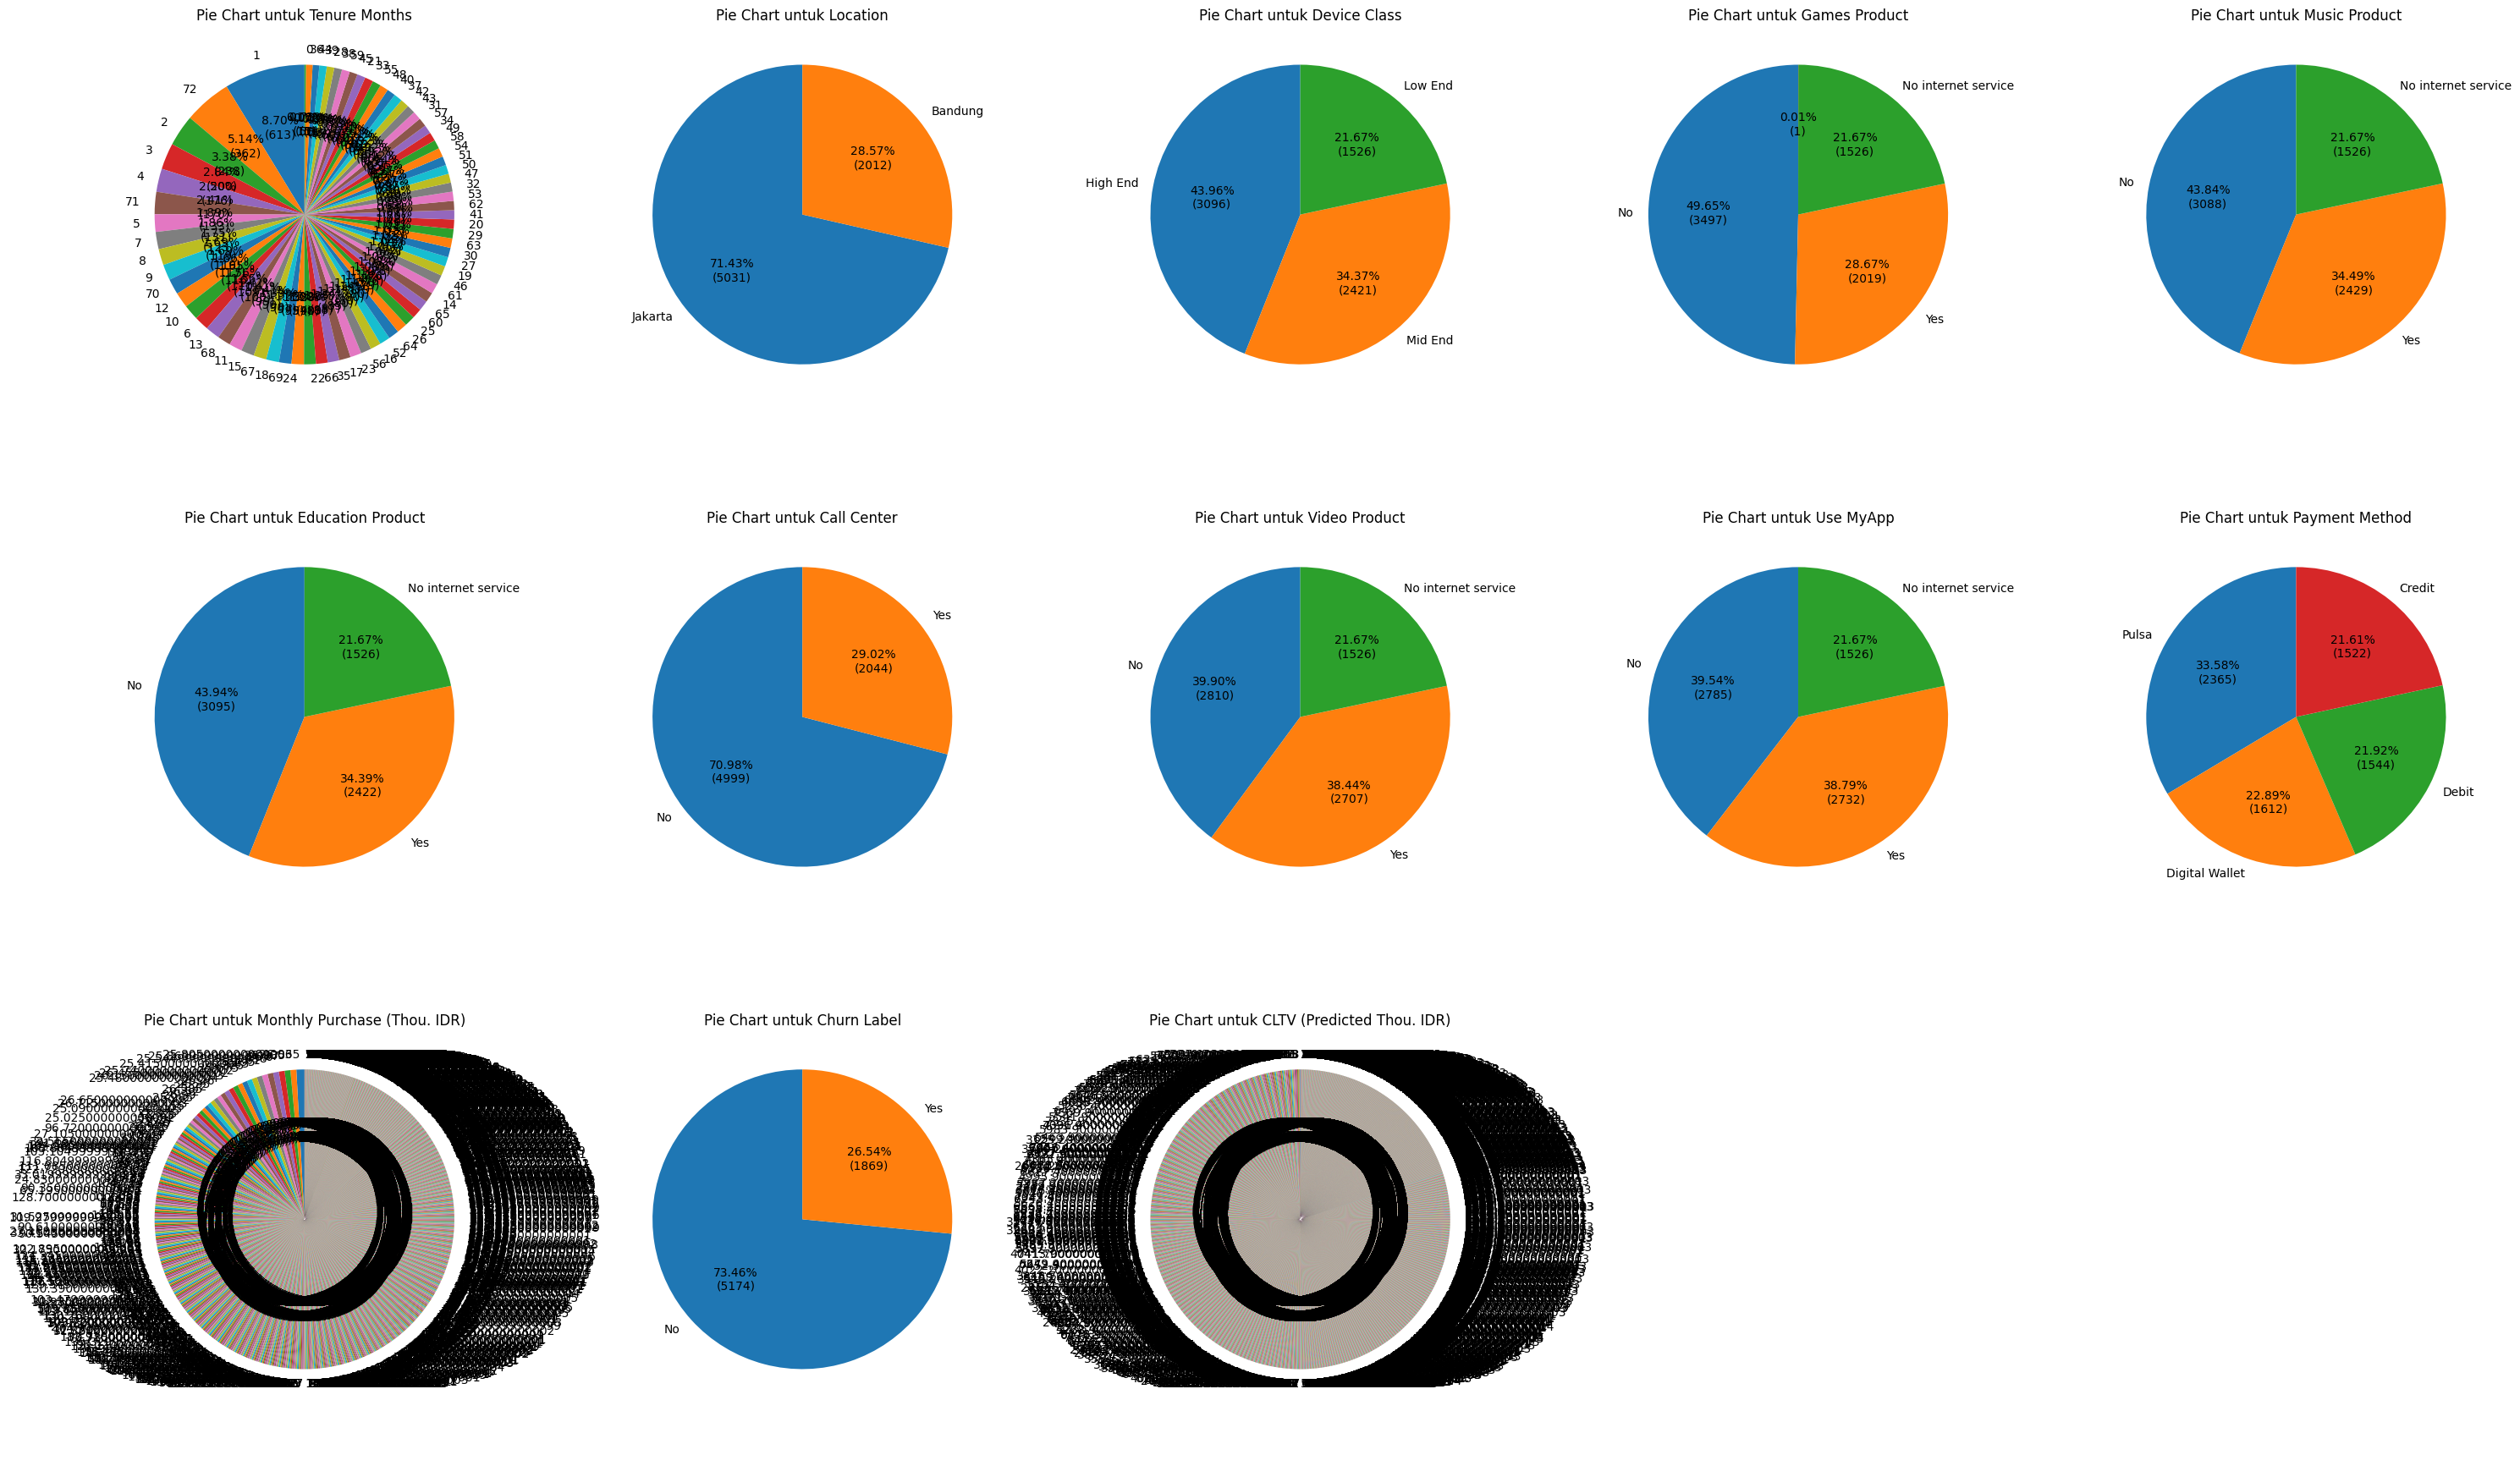

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

def plot_pie_for_each_column(df, num_cols):
    # Hitung jumlah kolom yang bukan numerik untuk menentukan ukuran grid subplot
    non_numeric_columns = [column for column in df.columns if column not in num_cols]
    num_plots = len(non_numeric_columns)
    
    # Tentukan jumlah kolom dan baris untuk subplots berdasarkan jumlah pie charts
    ncols = 5 # Atur jumlah kolom dalam grid subplot sesuai keinginan
    nrows = num_plots // ncols + (num_plots % ncols > 0)

    # Buat subplots dengan ukuran yang sesuai
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*6))
    
    # Flatten array jika lebih dari satu baris
    if nrows > 1:
        axes = axes.flatten()
    else:
        axes = [axes]
    
    # Buat pie chart untuk setiap kolom non-numerik
    for idx, column in enumerate(non_numeric_columns):
        counts = df[column].value_counts()
        axes[idx].pie(counts, labels=counts.index, autopct=make_autopct(counts), startangle=90)
        axes[idx].set_title(f'Pie Chart untuk {column}')

    # Sembunyikan axes yang tidak digunakan jika ada
    for idx in range(num_plots, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

# Contoh penggunaan fungsi:
plot_pie_for_each_column(df, num_cols)

In [ ]:
df.columns

Index(['Tenure Months', 'Location', 'Device Class', 'Games Product',
       'Music Product', 'Education Product', 'Call Center', 'Video Product',
       'Use MyApp', 'Payment Method', 'Monthly Purchase (Thou. IDR)',
       'Churn Label', 'CLTV (Predicted Thou. IDR)'],
      dtype='object')

In [ ]:
df.columns = ['tenure_months', 'loc', 'dev_class', 'games_prod', 'music_prod', 'edu_prod', 'call_prod', 'video_prod', 'use_app', 'pay_method', 'monthly_purchase', 'churn', 'cltv']
df.head()

,tenure_months,loc,dev_class,games_prod,music_prod,edu_prod,call_prod,video_prod,use_app,pay_method,monthly_purchase,churn,cltv
0,1,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.505,Yes,5371.6
1,9,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.635,Yes,7023.9
2,12,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.700,Yes,4595.5
3,1,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.830,Yes,7657.0
4,7,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Pulsa,25.025,Yes,5835.7


In [ ]:
devClass_mapping = {
    'Low End': 0,
    'Mid End': 1,
    'High End': 2,
}

prod = {
    'No internet service': 0,
    'No': 1,
    'Yes': 2,
}

churn = {
    'No': 0,
    'Yes': 1,
}

In [ ]:
# Terapkan mapping ke kolom dataframe
df['dev_class'] = df['dev_class'].map(devClass_mapping)
df.head()

,tenure_months,loc,dev_class,games_prod,music_prod,edu_prod,call_prod,video_prod,use_app,pay_method,monthly_purchase,churn,cltv
0,1,Jakarta,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.505,Yes,5371.6
1,9,Jakarta,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.635,Yes,7023.9
2,12,Jakarta,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.700,Yes,4595.5
3,1,Bandung,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.830,Yes,7657.0
4,7,Bandung,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,Pulsa,25.025,Yes,5835.7


In [ ]:
# Terapkan mapping ke kolom dataframe
df['churn'] = df['churn'].map(churn)
df.head()

,tenure_months,loc,dev_class,games_prod,music_prod,edu_prod,call_prod,video_prod,use_app,pay_method,monthly_purchase,churn,cltv
0,1,Jakarta,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.505,1,5371.6
1,9,Jakarta,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.635,1,7023.9
2,12,Jakarta,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.700,1,4595.5
3,1,Bandung,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.830,1,7657.0
4,7,Bandung,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,Pulsa,25.025,1,5835.7


In [ ]:
prod_cols = ['games_prod', 'music_prod', 'edu_prod', 'call_prod', 'video_prod', 'use_app']
for col in prod_cols:
    # Terapkan mapping ke kolom dataframe
    df[col] = df[col].map(prod)

df.head()

,tenure_months,loc,dev_class,games_prod,music_prod,edu_prod,call_prod,video_prod,use_app,pay_method,monthly_purchase,churn,cltv
0,1,Jakarta,0,0.0,0,0,1,0,0,Digital Wallet,24.505,1,5371.6
1,9,Jakarta,0,0.0,0,0,1,0,0,Digital Wallet,24.635,1,7023.9
2,12,Jakarta,0,0.0,0,0,1,0,0,Digital Wallet,24.700,1,4595.5
3,1,Bandung,0,0.0,0,0,1,0,0,Digital Wallet,24.830,1,7657.0
4,7,Bandung,0,0.0,0,0,1,0,0,Pulsa,25.025,1,5835.7


In [ ]:
# Membuat kolom 'churn_yes' dan 'churn_no'
df['churn_yes'] = (df['churn'] == 1).astype(int)
df['churn_no'] = (df['churn'] == 0).astype(int)


In [ ]:
# df = df.drop(['churn'], axis=1)

<AxesSubplot:>

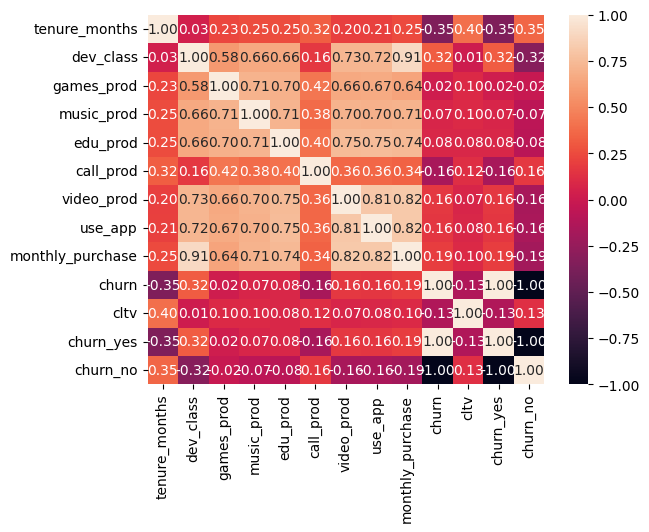

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [ ]:
df.columns()

NameError: name 'df' is not defined

# Rumusan Masalah
1. Customer mana yang lebih menguntungkan antara bandung dan jakarta?
2. Analisis Churn Customer berdasarkan tenure month dan kolom lain (customer yang churn itu rata rata setelah berlangganan berapa bulan??)
3. Hubungan Device Class dengan langganan yang dibeli (game,music,education,dll)
4. Analisis Ngepok Customer Churn “Yes” (ngepok???)
5. Produk apa yang membuat mahal??
6. Produk apa yang sekiranya bisa ditingkatkan (misal skema bundling)
7. Behaviour dari payment method bisa dibawa kemana?
8. Definisikan Karakteristik Customer yang Churn dan yang enggak mungkin dari situ bisa keliatan ada hubungan dimananya
9. Cari Variabel yang paling berkorelasi terus di cluster???\
10. Apa Akar masalahnya? Dan hubungannya kemana aja, bisa kita selesaikan atau usulkan kemana aja (tapi masalahnya bukan menyelesaikan akar masalahnya doang tapi kenapa itu merupakan akar masalah, dan kenapa itu yang harus di solve, bisa gak?)
11. Rata-rata orang yang berhenti berlangganan berapa itu setelah berlangganan berapa lama


## Customer mana yang lebih menguntungkan antara bandung dan jakarta

In [ ]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [ ]:
df.head()

,tenure_months,loc,dev_class,games_prod,music_prod,edu_prod,call_prod,video_prod,use_app,pay_method,monthly_purchase,churn,cltv,churn_yes,churn_no
0,1,jakarta,0,0.0,0,0,1,0,0,digital wallet,24.505,1,5371.6,1,0
1,9,jakarta,0,0.0,0,0,1,0,0,digital wallet,24.635,1,7023.9,1,0
2,12,jakarta,0,0.0,0,0,1,0,0,digital wallet,24.700,1,4595.5,1,0
3,1,bandung,0,0.0,0,0,1,0,0,digital wallet,24.830,1,7657.0,1,0
4,7,bandung,0,0.0,0,0,1,0,0,pulsa,25.025,1,5835.7,1,0


In [ ]:
df_bandung = df[df['loc'] == 'bandung']
df_bandung

,tenure_months,loc,dev_class,games_prod,music_prod,edu_prod,call_prod,video_prod,use_app,pay_method,monthly_purchase,churn,cltv,churn_yes,churn_no
3,1,bandung,0,0.0,0,0,1,0,0,digital wallet,24.830,1,7657.0,1,0
4,7,bandung,0,0.0,0,0,1,0,0,pulsa,25.025,1,5835.7,1,0
10,59,bandung,0,0.0,0,0,1,0,0,digital wallet,25.155,1,6609.2,1,0
14,1,bandung,0,0.0,0,0,1,0,0,digital wallet,25.220,1,5397.6,1,0
23,31,bandung,0,0.0,0,0,1,0,0,digital wallet,25.415,1,3493.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6951,72,bandung,2,1.0,1,2,1,2,2,pulsa,127.205,0,5860.4,0,1
6952,44,bandung,0,0.0,0,0,1,0,0,debit,25.415,0,7618.0,0,1
6953,72,bandung,2,2.0,2,1,1,1,1,debit,109.265,0,7169.5,0,1
6954,54,bandung,2,1.0,1,2,1,1,2,credit,116.220,0,7632.3,0,1


In [ ]:
df_jakarta = df[df['loc'] == 'jakarta']
df_jakarta

,tenure_months,loc,dev_class,games_prod,music_prod,edu_prod,call_prod,video_prod,use_app,pay_method,monthly_purchase,churn,cltv,churn_yes,churn_no
0,1,jakarta,0,0.0,0,0,1,0,0,digital wallet,24.505,1,5371.6,1,0
1,9,jakarta,0,0.0,0,0,1,0,0,digital wallet,24.635,1,7023.9,1,0
2,12,jakarta,0,0.0,0,0,1,0,0,digital wallet,24.700,1,4595.5,1,0
5,11,jakarta,0,0.0,0,0,1,0,0,digital wallet,25.025,1,7329.4,1,0
6,1,jakarta,0,0.0,0,0,1,0,0,digital wallet,25.025,1,7068.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,jakarta,0,0.0,0,0,1,0,0,debit,27.495,0,6897.8,0,1
7039,24,jakarta,1,2.0,1,2,2,2,2,digital wallet,110.240,0,2782.0,0,1
7040,72,jakarta,2,1.0,2,2,1,2,2,credit,134.160,0,7228.0,0,1
7041,11,jakarta,1,2.0,1,1,1,1,1,pulsa,38.480,0,3630.9,0,1


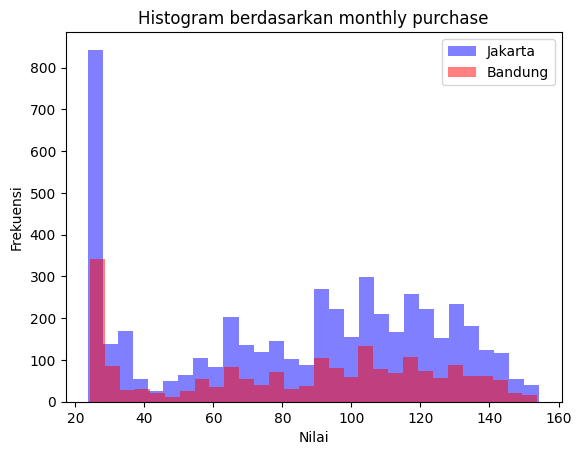

In [ ]:
# Membuat histogram
plt.hist(df_jakarta['monthly_purchase'], bins=30, alpha=0.5, label='Jakarta', color='blue')
plt.hist(df_bandung['monthly_purchase'], bins=30, alpha=0.5, label='Bandung', color='red')

# Menambahkan judul dan label
plt.title('Histogram berdasarkan monthly purchase')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

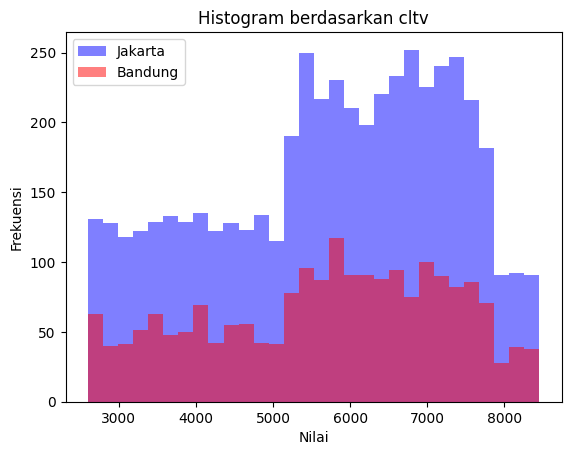

In [ ]:
# Membuat histogram
plt.hist(df_jakarta['cltv'], bins=30, alpha=0.5, label='Jakarta', color='blue')
plt.hist(df_bandung['cltv'], bins=30, alpha=0.5, label='Bandung', color='red')

# Menambahkan judul dan label
plt.title('Histogram berdasarkan cltv')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

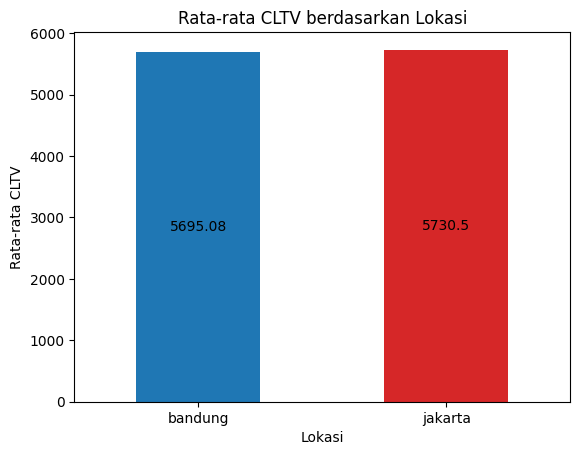

In [ ]:
# Hitung rata-rata cltv berdasarkan lokasi
cltv_mean = df.groupby("loc")["cltv"].mean()

# Buat daftar warna
bar_colors = [ 'tab:blue', 'tab:red', 'tab:orange']
ax = cltv_mean.plot.bar(rot=0, color=bar_colors, title="Rata-rata CLTV berdasarkan Lokasi")
ax.bar_label(ax.containers[0], label_type="center")
ax.set_xlabel("Lokasi")
ax.set_ylabel("Rata-rata CLTV")

# Tampilkan bar plot
plt.show()

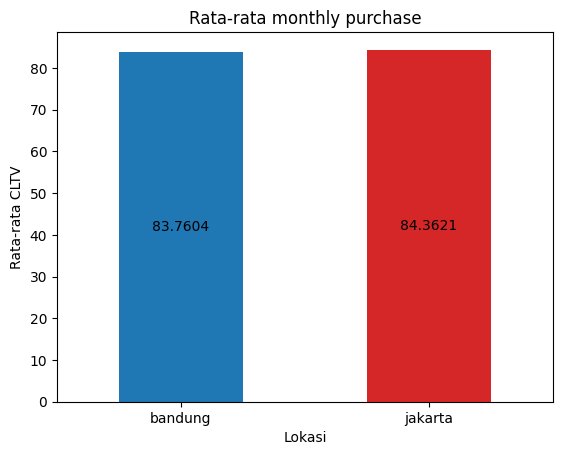

In [ ]:
# Hitung rata-rata cltv berdasarkan lokasi
monthly_purchase_mean = df.groupby("loc")["monthly_purchase"].mean()

# Buat daftar warna
bar_colors = [ 'tab:blue', 'tab:red', 'tab:orange']
ax = monthly_purchase_mean.plot.bar(rot=0, color=bar_colors, title="Rata-rata monthly purchase")
ax.bar_label(ax.containers[0], label_type="center")
ax.set_xlabel("Lokasi")
ax.set_ylabel("Rata-rata CLTV")

# Tampilkan bar plot
plt.show()

## Analisis Churn Customer berdasarkan tenure month dan kolom lain (customer yang churn itu rata rata setelah berlangganan berapa bulan??)

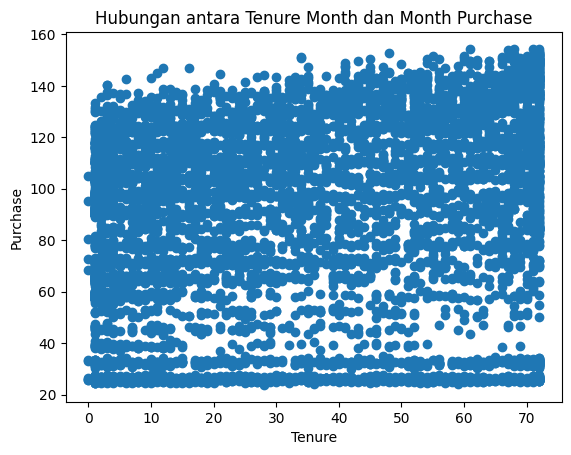

In [ ]:
plt.scatter(df['tenure_months'], df['monthly_purchase'])
plt.xlabel('Tenure')
plt.ylabel('Purchase')
plt.title('Hubungan antara Tenure Month dan Month Purchase')
plt.show()


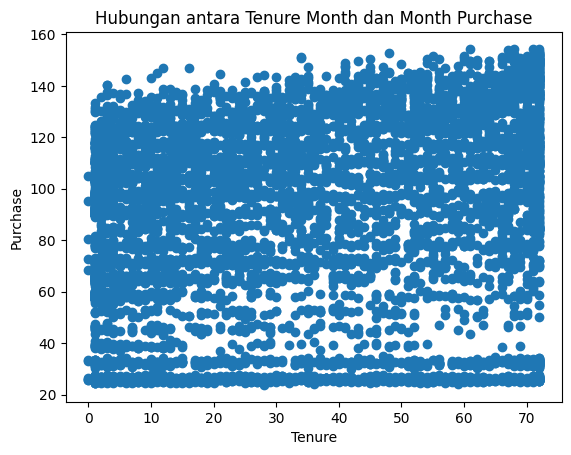

In [ ]:
plt.scatter(df['tenure_months'], df['monthly_purchase'])
plt.xlabel('Tenure')
plt.ylabel('Purchase')
plt.title('Hubungan antara Tenure Month dan Month Purchase')
plt.show()


# Rumusan Masalah

### Kenapa customer memutuskan untuk churn

In [ ]:
df.head()

,tenure_months,loc,dev_class,games_prod,music_prod,edu_prod,call_prod,video_prod,use_app,pay_method,monthly_purchase,churn,cltv,churn_yes,churn_no
0,1,jakarta,0,0.0,0,0,1,0,0,digital wallet,24.505,1,5371.6,1,0
1,9,jakarta,0,0.0,0,0,1,0,0,digital wallet,24.635,1,7023.9,1,0
2,12,jakarta,0,0.0,0,0,1,0,0,digital wallet,24.700,1,4595.5,1,0
3,1,bandung,0,0.0,0,0,1,0,0,digital wallet,24.830,1,7657.0,1,0
4,7,bandung,0,0.0,0,0,1,0,0,pulsa,25.025,1,5835.7,1,0


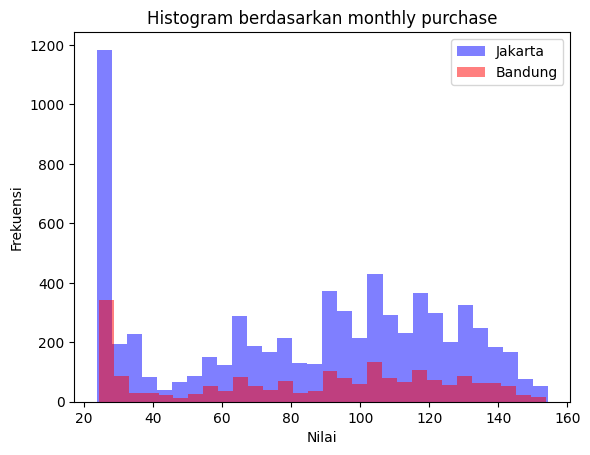

In [ ]:
# Membuat histogram
plt.hist(df['monthly_purchase'], bins=30, alpha=0.5, label='Jakarta', color='blue')
plt.hist(df_bandung['monthly_purchase'], bins=30, alpha=0.5, label='Bandung', color='red')

# Menambahkan judul dan label
plt.title('Histogram berdasarkan monthly purchase')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [ ]:
df.head()

,tenure_months,loc,dev_class,games_prod,music_prod,edu_prod,call_prod,video_prod,use_app,pay_method,monthly_purchase,churn,cltv,churn_yes,churn_no
0,1,jakarta,0,0.0,0,0,1,0,0,digital wallet,24.505,1,5371.6,1,0
1,9,jakarta,0,0.0,0,0,1,0,0,digital wallet,24.635,1,7023.9,1,0
2,12,jakarta,0,0.0,0,0,1,0,0,digital wallet,24.700,1,4595.5,1,0
3,1,bandung,0,0.0,0,0,1,0,0,digital wallet,24.830,1,7657.0,1,0
4,7,bandung,0,0.0,0,0,1,0,0,pulsa,25.025,1,5835.7,1,0


In [ ]:
# Hitung jumlah churn 'Yes' dan 'No' untuk setiap 'Tenure Months'.
churn_yes = df[df['churn'] == 1].groupby('tenure_months').size()
churn_no = df[df['churn'] == 0].groupby('tenure_months').size()

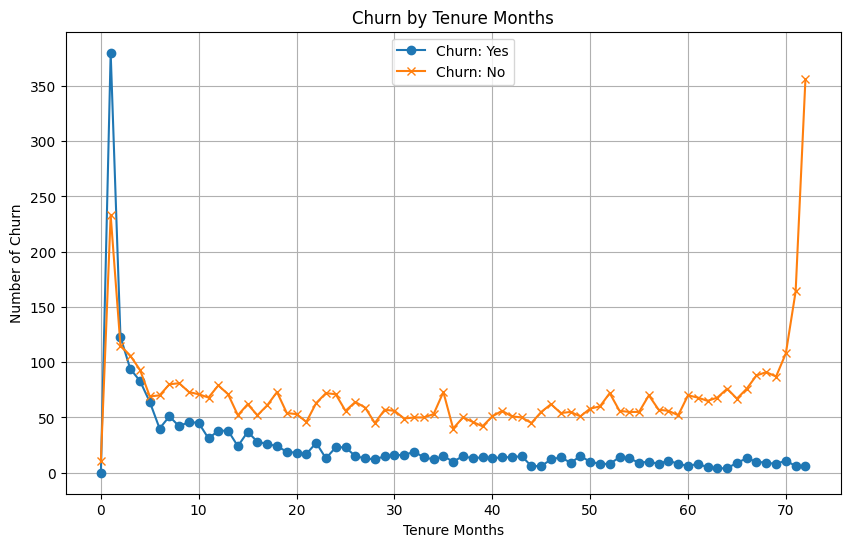

In [ ]:
# Gabungkan kedua series tersebut menjadi satu dataframe untuk plotting.
churn_data = pd.DataFrame({'Yes': churn_yes, 'No': churn_no}).fillna(0)

# Plot line chart.
plt.figure(figsize=(10, 6))
plt.plot(churn_data.index, churn_data['Yes'], label='Churn: Yes', marker='o')
plt.plot(churn_data.index, churn_data['No'], label='Churn: No', marker='x')

# Tambahkan judul dan label.
plt.title('Churn by Tenure Months')
plt.xlabel('Tenure Months')
plt.ylabel('Number of Churn')

# Tampilkan legenda.
plt.legend()

# Tampilkan grid.
plt.grid(True)

# Tampilkan grafik.
plt.show()